<a href="https://colab.research.google.com/github/ikwak2/prac_class/blob/main/notebook/dplyr_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data transformation - dplyr

In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.4
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## nycflights13

Dataset on flights departing New York City in 2013.

In [ ]:
install.packages("nycflights13")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(nycflights13)


In [ ]:
flights[1:5,]

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00


- __< int >__ stands for integers.
- __< dbl >__ stands for doubles, or real numbers.
- __< chr >__ stands for character vectors, or strings.
- __< dttm >__ stands for date-times (a date + a time).
- __< lgl >__ stands for logical, vectors that contain only TRUE or FALSE.
- __< fctr >__ stands for factors, which R uses to represent categorical variables with fixed possible values.
- __< date >__ stands for dates.

In [ ]:
?flights

## Filter rows with filter()

In [ ]:
filter(flights, month == 1, day == 1) %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [ ]:
flights %>% filter(month == 1, day == 1) %>% filter(dest == 'ORD') %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00
2013,1,1,608,600,8,807,735,32,MQ,3768,N9EAMQ,EWR,ORD,139,719,6,0,2013-01-01 06:00:00
2013,1,1,629,630,-1,824,810,14,AA,303,N3CYAA,LGA,ORD,140,733,6,30,2013-01-01 06:00:00
2013,1,1,656,700,-4,854,850,4,AA,305,N4WNAA,LGA,ORD,143,733,7,0,2013-01-01 07:00:00
2013,1,1,709,700,9,852,832,20,UA,1092,N26226,LGA,ORD,135,733,7,0,2013-01-01 07:00:00


In [ ]:
flights %>% filter(month == 1 & day == 1 & dest == 'ORD') %>% head()


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00
2013,1,1,608,600,8,807,735,32,MQ,3768,N9EAMQ,EWR,ORD,139,719,6,0,2013-01-01 06:00:00
2013,1,1,629,630,-1,824,810,14,AA,303,N3CYAA,LGA,ORD,140,733,6,30,2013-01-01 06:00:00
2013,1,1,656,700,-4,854,850,4,AA,305,N4WNAA,LGA,ORD,143,733,7,0,2013-01-01 07:00:00
2013,1,1,709,700,9,852,832,20,UA,1092,N26226,LGA,ORD,135,733,7,0,2013-01-01 07:00:00


In [ ]:
flights %>% filter(month == 1 & day == 1 & dest %in% c('ORD','LAS')) %>% head()


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00
2013,1,1,559,600,-1,854,902,-8,UA,1187,N76515,EWR,LAS,337,2227,6,0,2013-01-01 06:00:00
2013,1,1,608,600,8,807,735,32,MQ,3768,N9EAMQ,EWR,ORD,139,719,6,0,2013-01-01 06:00:00
2013,1,1,629,630,-1,824,810,14,AA,303,N3CYAA,LGA,ORD,140,733,6,30,2013-01-01 06:00:00
2013,1,1,651,655,-4,936,942,-6,B6,203,N558JB,JFK,LAS,323,2248,6,55,2013-01-01 06:00:00


## Arrange rows with arrange()

In [ ]:
arrange(flights, year, month, day) %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


Use desc() for descending order

In [ ]:
arrange(flights, desc(dep_delay)) %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00
2013,1,10,1121,1635,1126,1239,1810,1109,MQ,3695,N517MQ,EWR,ORD,111,719,16,35,2013-01-10 16:00:00
2013,9,20,1139,1845,1014,1457,2210,1007,AA,177,N338AA,JFK,SFO,354,2586,18,45,2013-09-20 18:00:00
2013,7,22,845,1600,1005,1044,1815,989,MQ,3075,N665MQ,JFK,CVG,96,589,16,0,2013-07-22 16:00:00
2013,4,10,1100,1900,960,1342,2211,931,DL,2391,N959DL,JFK,TPA,139,1005,19,0,2013-04-10 19:00:00


## Select columns with select()


In [ ]:
select(flights, year, month, day) %>% head()


year,month,day
<int>,<int>,<int>
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1


In [ ]:
select(flights, year:day) %>% head()


year,month,day
<int>,<int>,<int>
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1


In [ ]:
select(flights, year:day) %>% head()

In [ ]:
select(flights, -(year:day)) %>% head()

dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


### Helper functions

- starts_with("abc"): matches names that begin with “abc”.
- ends_with("xyz"): matches names that end with “xyz”.
- contains("ijk"): matches names that contain “ijk”.
- num_range("x", 1:3): matches x1, x2 and x3.

In [ ]:
select(flights, starts_with("arr")) %>% head()

arr_time,arr_delay
<int>,<dbl>
830,11
850,20
923,33
1004,-18
812,-25
740,12


In [ ]:
select(flights, contains("arr")) %>% head()

arr_time,sched_arr_time,arr_delay,carrier
<int>,<int>,<dbl>,<chr>
830,819,11,UA
850,830,20,UA
923,850,33,AA
1004,1022,-18,B6
812,837,-25,DL
740,728,12,UA


Rename the variable with rename()

In [ ]:
rename(flights, tail_num = tailnum) %>% head

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tail_num,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [ ]:
select(flights, time_hour, air_time, everything()) %>% head()

time_hour,air_time,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,distance,hour,minute
<dttm>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
2013-01-01 05:00:00,227,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,1400,5,15
2013-01-01 05:00:00,227,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,1416,5,29
2013-01-01 05:00:00,160,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,1089,5,40
2013-01-01 05:00:00,183,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,1576,5,45
2013-01-01 06:00:00,116,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,762,6,0
2013-01-01 05:00:00,150,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,719,5,58


## Add new variables with mutate()

In [ ]:
flights %>% select(year:day, ends_with("delay"), distance, air_time) %>% head() 


year,month,day,dep_delay,arr_delay,distance,air_time
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,2,11,1400,227
2013,1,1,4,20,1416,227
2013,1,1,2,33,1089,160
2013,1,1,-1,-18,1576,183
2013,1,1,-6,-25,762,116
2013,1,1,-4,12,719,150


In [ ]:
flights %>% 
    select(year:day, ends_with("delay"), distance, air_time) %>% 
    mutate(gain = dep_delay - arr_delay,
              hours = air_time / 60,
              gain_per_hour = gain / hours) %>% head()

year,month,day,dep_delay,arr_delay,distance,air_time,gain,hours,gain_per_hour
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,2,11,1400,227,-9,3.783333,-2.378855
2013,1,1,4,20,1416,227,-16,3.783333,-4.229075
2013,1,1,2,33,1089,160,-31,2.666667,-11.625000
2013,1,1,-1,-18,1576,183,17,3.050000,5.573770
2013,1,1,-6,-25,762,116,19,1.933333,9.827586
2013,1,1,-4,12,719,150,-16,2.500000,-6.400000


## Grouped summaries with summarise()


In [ ]:
flights %>% group_by(year, month, day) %>% 
summarise(delay = mean(dep_delay, na.rm = TRUE)) %>% head()


`summarise()` has grouped output by 'year', 'month'. You can override using the `.groups` argument.



year,month,day,delay
<int>,<int>,<int>,<dbl>
2013,1,1,11.548926
2013,1,2,13.858824
2013,1,3,10.987832
2013,1,4,8.951595
2013,1,5,5.732218
2013,1,6,7.148014


In [ ]:
flights %>% group_by(origin) %>% 
summarise(delay = mean(dep_delay, na.rm = TRUE), sd_delay = sd(dep_delay, na.rm = TRUE)) %>% head()

origin,delay,sd_delay
<chr>,<dbl>,<dbl>
EWR,15.10795,41.32370
JFK,12.11216,39.03507
LGA,10.34688,39.99302


In [ ]:
flights %>% group_by(dest) %>% 
   summarise(count = n(), dist = mean(distance, na.rm = TRUE), delay = mean(arr_delay, na.rm = TRUE) ) %>%
   filter(count > 20, dest != "HNL") %>% head()



dest,count,dist,delay
<chr>,<int>,<dbl>,<dbl>
ABQ,254,1826.0000,4.381890
ACK,265,199.0000,4.852273
ALB,439,143.0000,14.397129
ATL,17215,757.1082,11.300113
AUS,2439,1514.2530,6.019909
AVL,275,583.5818,8.003831


It looks like delays increase with distance up to ~750 miles and then decrease. Maybe as flights get longer there's more ability to make up delays in the air?


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



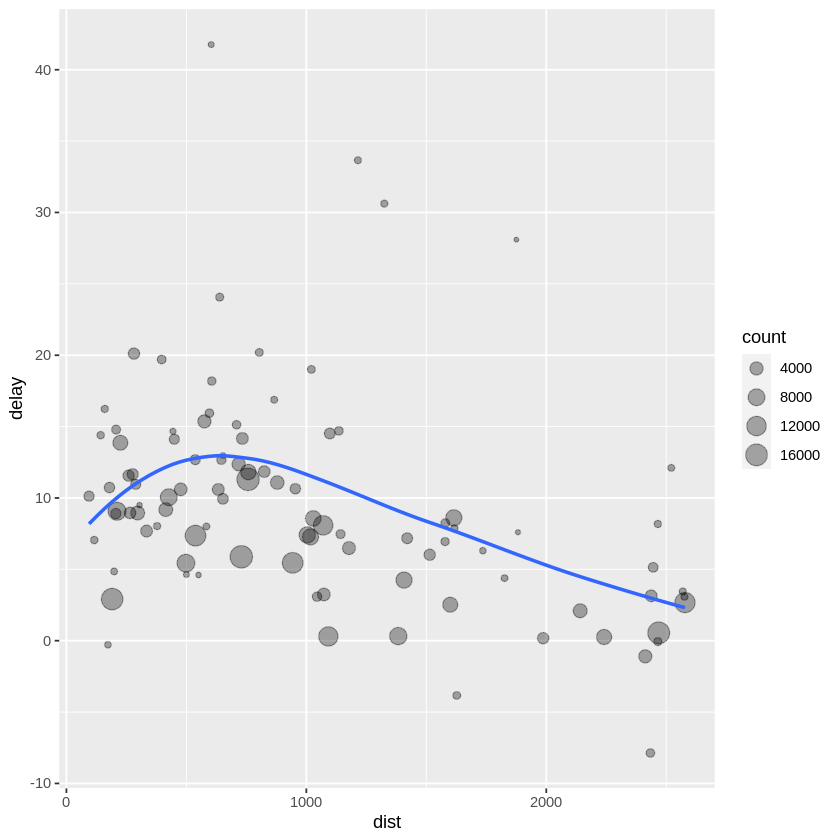

In [ ]:
flights %>% group_by(dest) %>% 
   summarise(count = n(), dist = mean(distance, na.rm = TRUE), delay = mean(arr_delay, na.rm = TRUE) ) %>%
   filter(count > 20, dest != "HNL") %>% 
ggplot(mapping = aes(x = dist, y = delay)) +
  geom_point(aes(size = count), alpha = 1/3) +
  geom_smooth(se = FALSE)

# Data visualization - ggplot

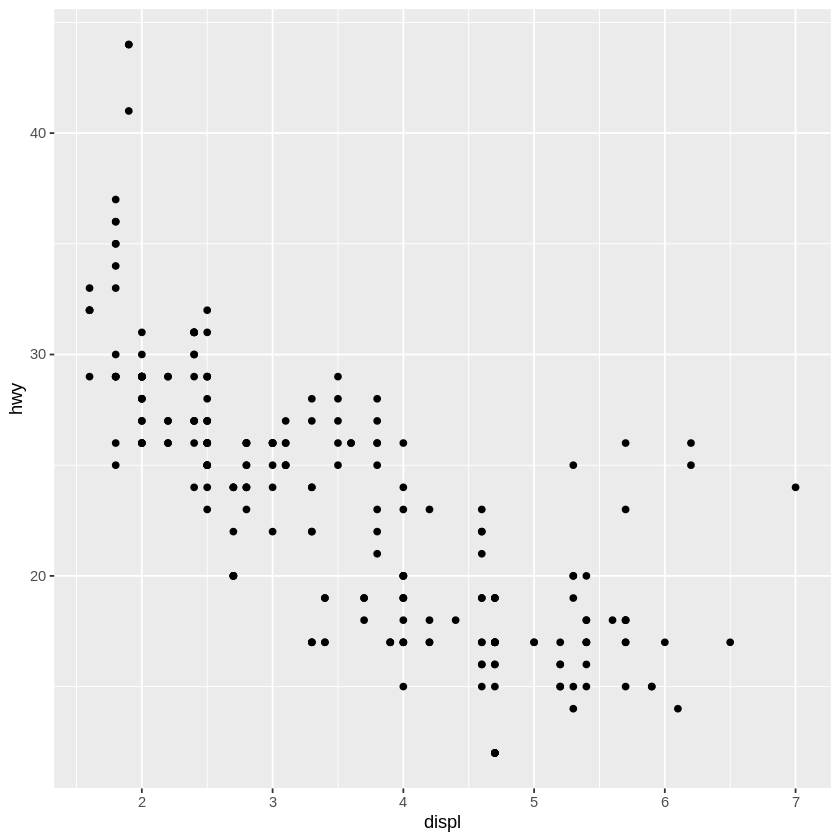

In [ ]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy))

declare global mapping information in ggplot() 

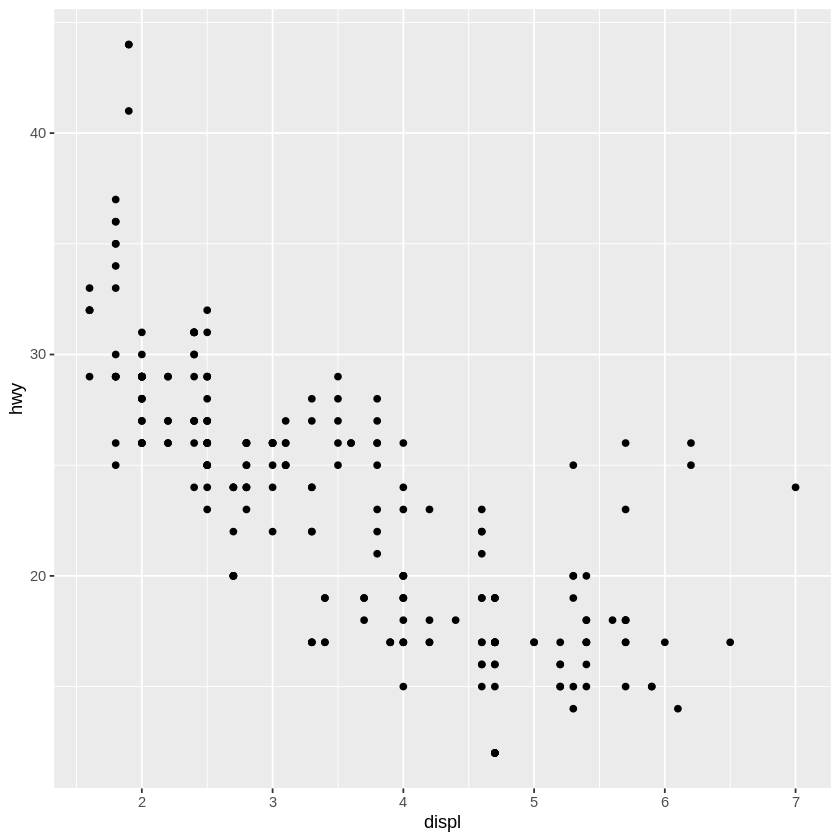

In [ ]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point()

Add graphical layers

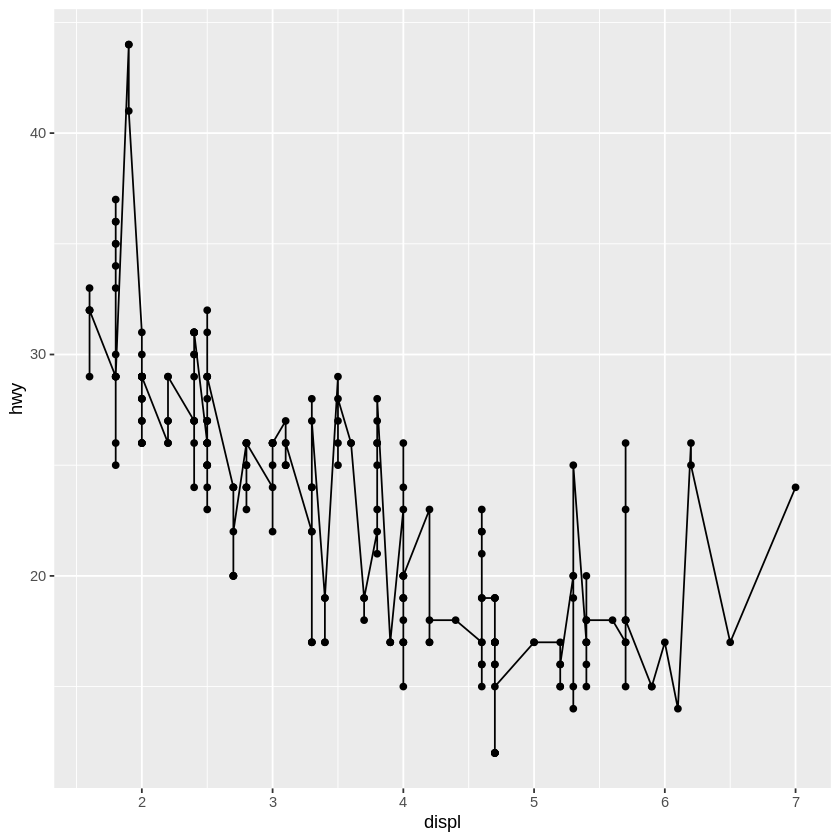

In [ ]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point() + 
  geom_line()

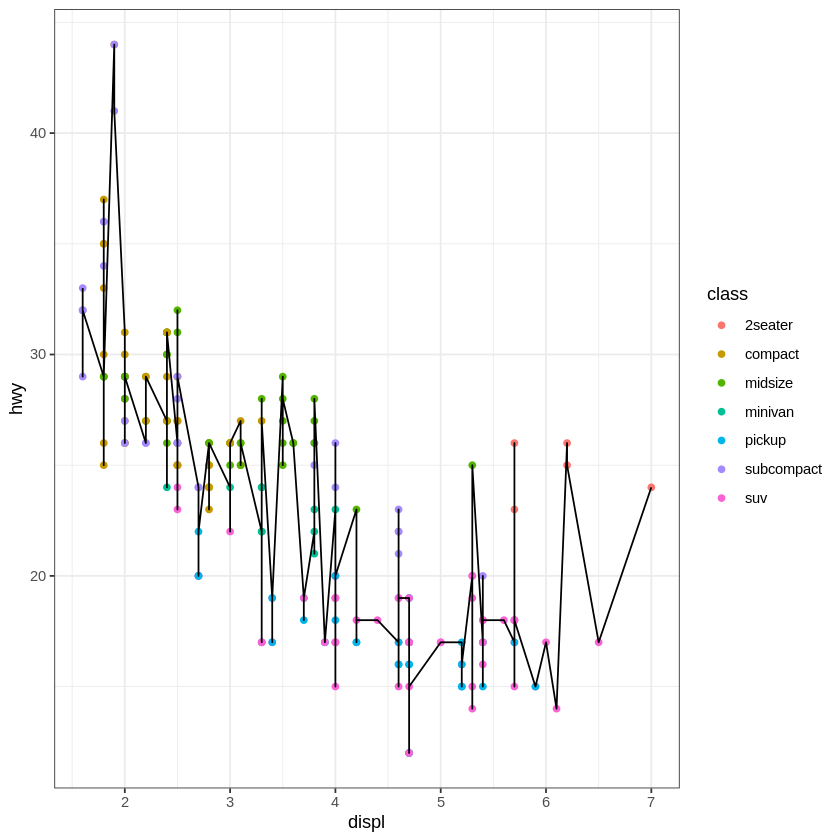

In [ ]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point() + 
  geom_line() + theme_bw()

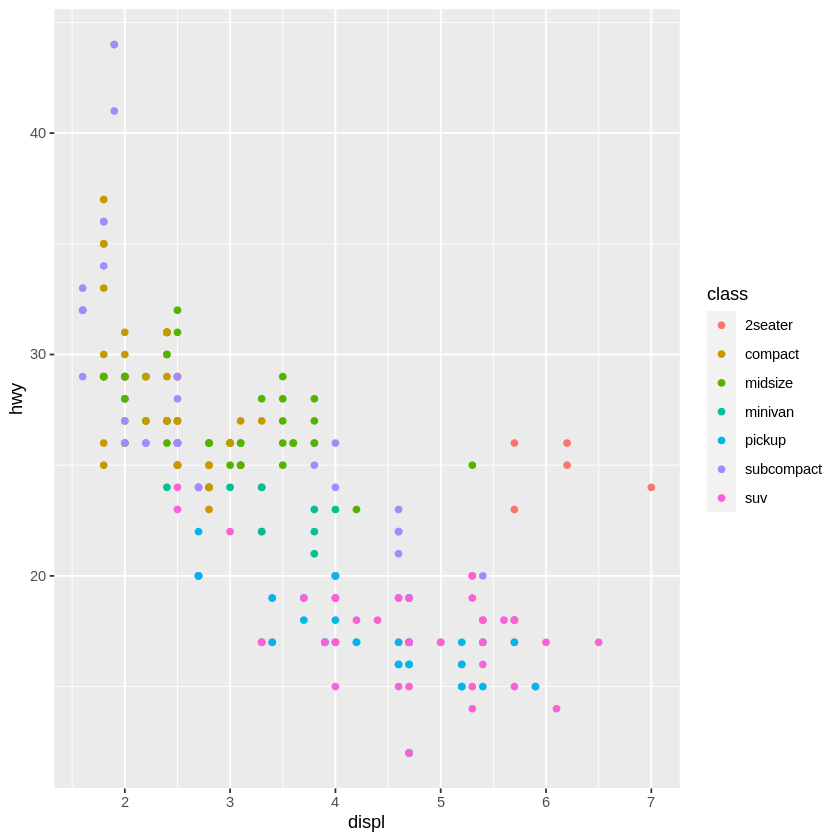

In [ ]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy, color = class)) + geom_point()

Warning message:
“Using size for a discrete variable is not advised.”


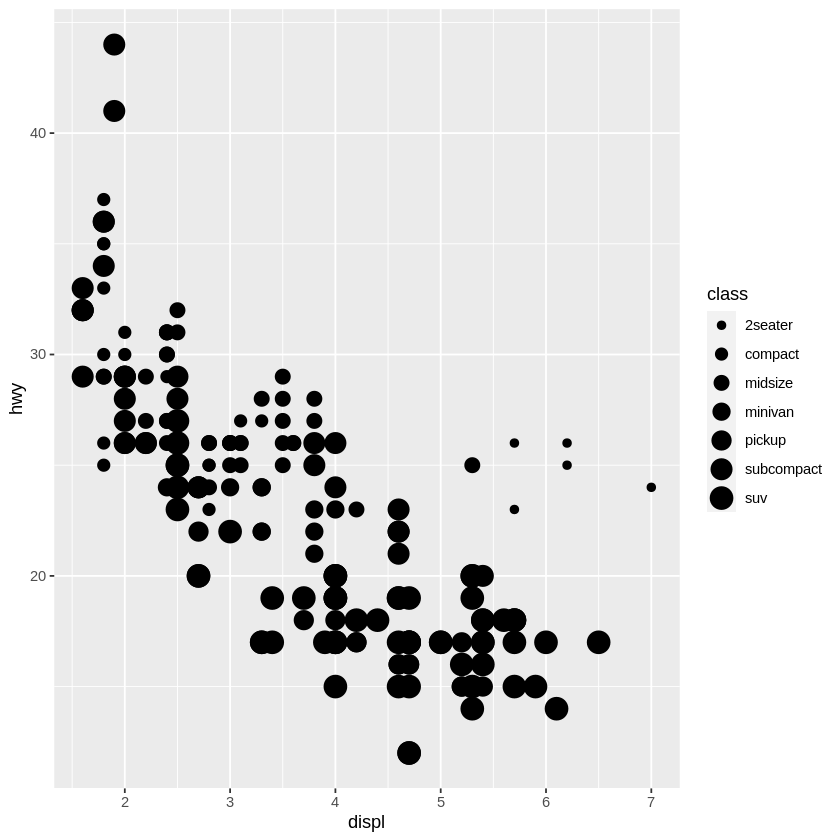

In [ ]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy, size = class)) + geom_point()

Warning message:
“Using alpha for a discrete variable is not advised.”


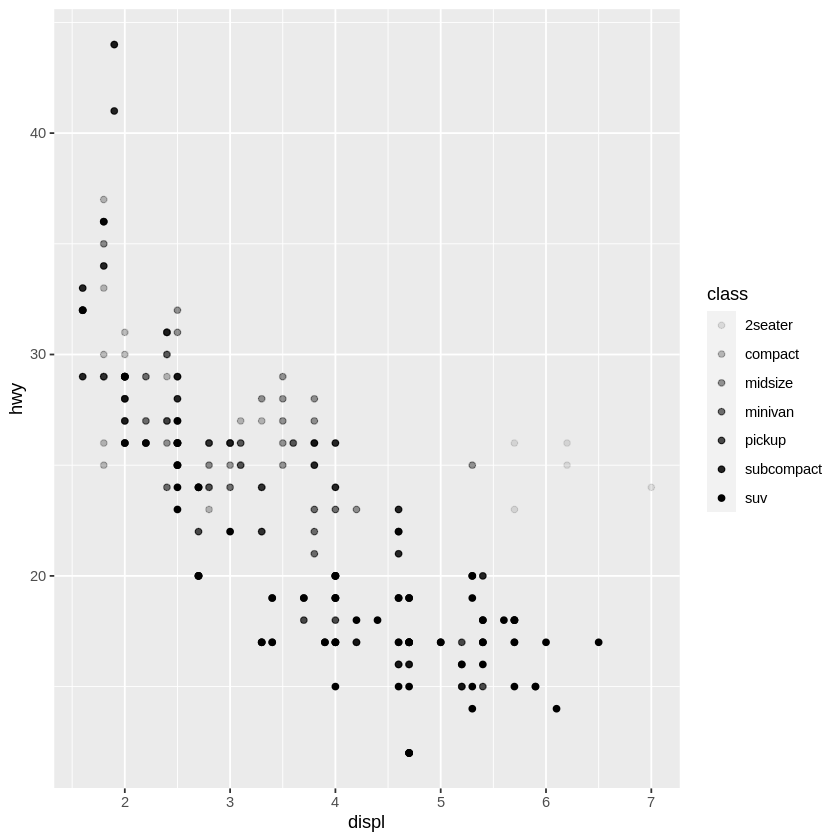

In [ ]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy, alpha = class)) + geom_point()

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 62 rows containing missing values (geom_point).”


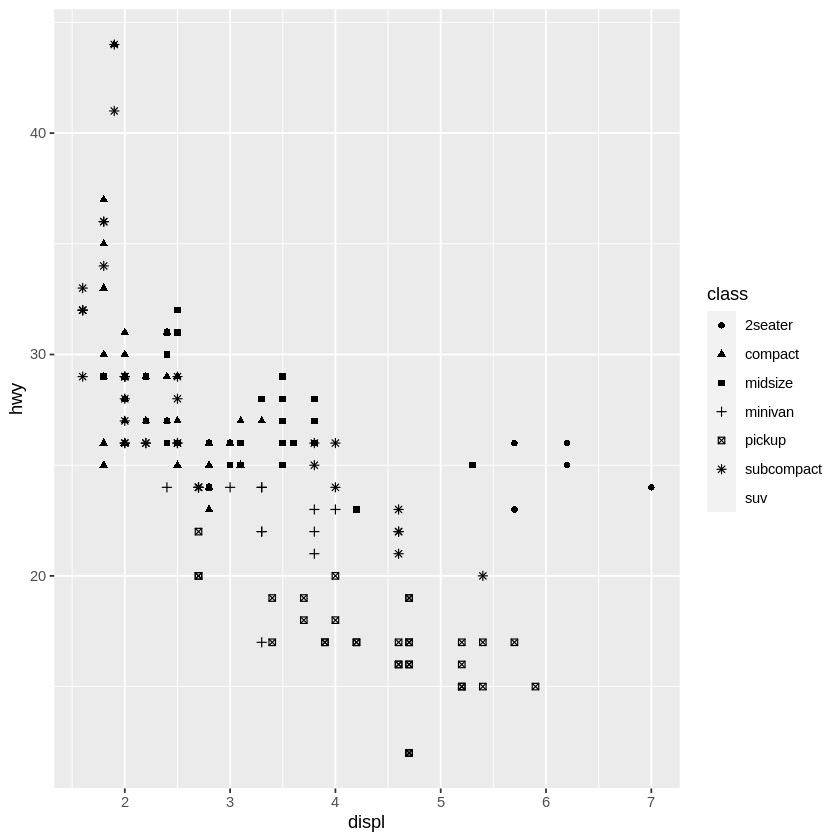

In [ ]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy, shape = class)) + geom_point()

## Facet

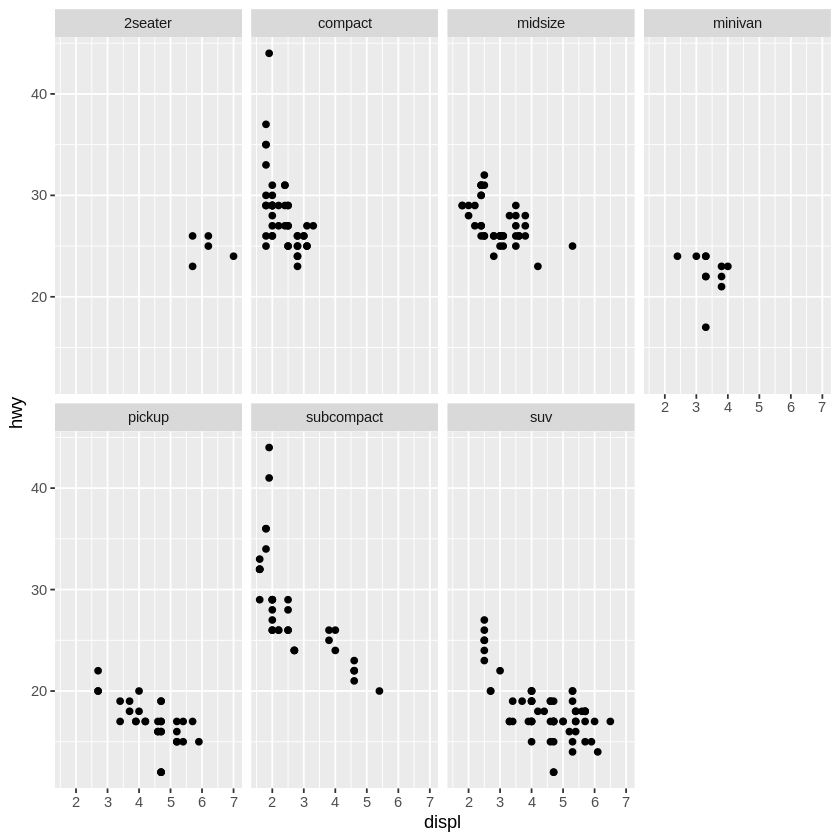

In [ ]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ class, nrow = 2)

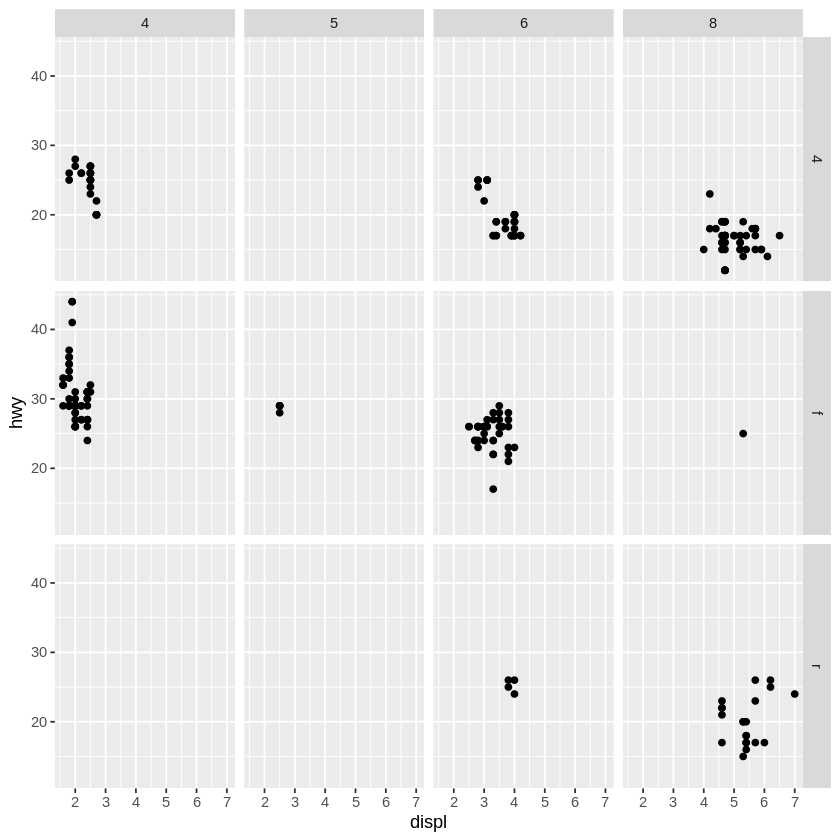

In [ ]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(drv ~ cyl)

## Theme



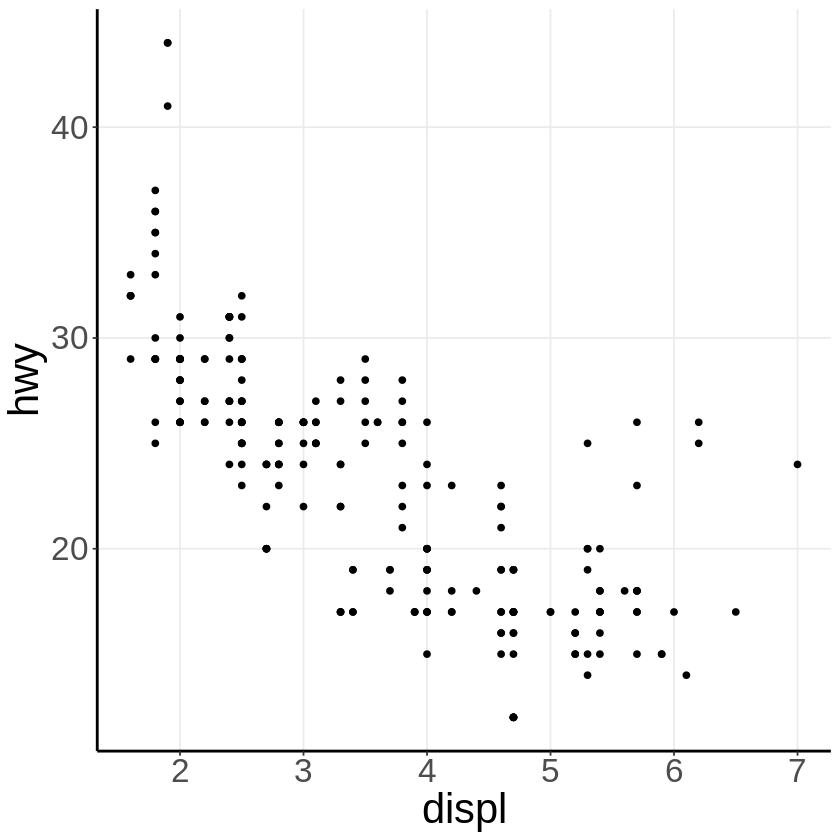

In [ ]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + theme_bw() +
  theme(axis.line= element_line(size=.8, colour = "black"),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        text = element_text(size = 25))

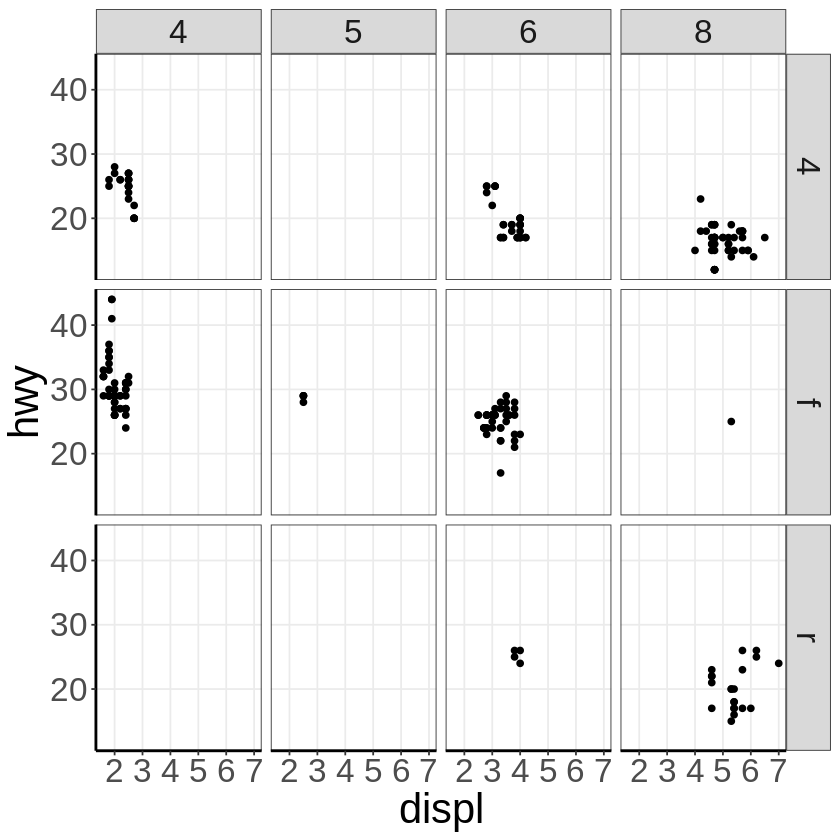

In [ ]:
ggplot(data = mpg) + theme_bw() +
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(drv ~ cyl)  +
  theme(axis.line= element_line(size=.8, colour = "black"),
        panel.grid.minor = element_blank(),
        text = element_text(size = 25))